In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon, ttest_ind, mannwhitneyu, ranksums

PROJECTION_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/"

chr2 = PROJECTION_PATH + "chr2_mean_scores.csv"
fc = PROJECTION_PATH + "FC_Tone_Start_Event_7.csv"
fc_start = PROJECTION_PATH + "FC_Tone_Start_Event_1.csv"

## ChR2

Network 1 Results:  WilcoxonResult(statistic=20.0, pvalue=0.13916015625)


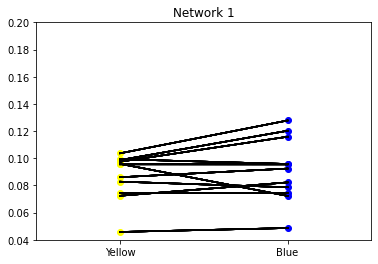

Network 2 Results:  WilcoxonResult(statistic=0.0, pvalue=0.00048828125)


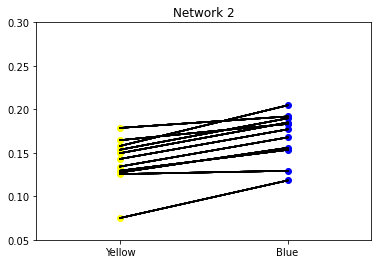

In [11]:
df_chr2 = pd.read_csv(chr2)

x1 = np.zeros(df_chr2.shape[0])
x2 = np.ones(df_chr2.shape[0])

y1 = df_chr2["net 1 avgYLaserScore"]
y2 = df_chr2["net 1 avgBLaserScore"]

print("Network 1 Results: ",wilcoxon(y1,y2,alternative="less"))

for p1,p2 in zip(y1,y2):
    plt.plot([0,1],[y1,y2],color="black")
    
plt.scatter(x1,y1,color="yellow")
plt.scatter(x2,y2,color="blue")
plt.ylim([0.04,0.20])
plt.xticks([0,1],["Yellow","Blue"])
plt.xlim([-0.5,1.5])
plt.title("Network 1")
plt.show()


x1 = np.zeros(df_chr2.shape[0])
x2 = np.ones(df_chr2.shape[0])

y1 = df_chr2["net 2 avgYLaserScore"]
y2 = df_chr2["net 2 avgBLaserScore"]

print("Network 2 Results: ",wilcoxon(y1,y2,alternative="less"))

for p1,p2 in zip(y1,y2):
    plt.plot([0,1],[y1,y2],color="black")
    
plt.scatter(x1,y1,color="yellow")
plt.scatter(x2,y2,color="blue")
plt.ylim([0.05,0.30])
plt.xticks([0,1],["Yellow","Blue"])
plt.xlim([-0.5,1.5])
plt.title("Network 2")
plt.show()

## Fear Conditioning

In [37]:
df = pd.read_csv(fc)
ten_before = np.arange(-10,0).astype(int)
tw_after = np.arange(0,20).astype(int)
airpuff = np.array([28,29])

#### Behavior

Control Var: 195.90 Fear Conditioned Var: 117.72
MannwhitneyuResult(statistic=21.0, pvalue=0.000231787367897751)


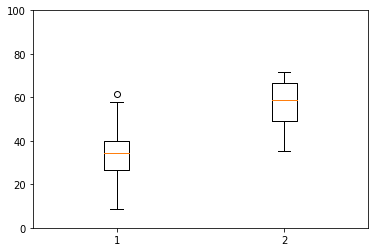

In [13]:
#FC_CR = [44.4,27.8,50.6,39.4,58.6,42.3,45.2,60.8,
#         57.3,71.5,48.9,35.4,67.9,52.7,66.4,68,65.3]
#C_CR = [29,35.3,20.3,25.3,33.6,35.5,38.5,22.1,41.4,34.
#        2,27.6,25.6,8.8,12.7,36.8,32.4,51.2,57.7,61.7,19.5,20.4,47.5]

FC_CR = [
    58.6, 42.3, 45.2, 60.8, 57.3, 71.5,
    48.9, 35.4, 67.9, 52.7, 66.4, 68.0, 65.3
]

C_CR = [
    33.6, 35.5, 38.5, 22.1, 41.4, 34.2, 27.6, 25.6, 8.8, 12.7, 36.8, 32.4,
    57.7, 61.7, 47.5
]
print("Control Var: {:.2f} Fear Conditioned Var: {:.2f}".format(np.std(C_CR)**2,np.std(FC_CR)**2))
result = mannwhitneyu(C_CR,FC_CR,alternative="less")
print(result)

plt.boxplot([C_CR,FC_CR])
plt.ylim([0,100])
plt.show()

#### 10s before

Net 1 10s before g1vsg2 results:  MannwhitneyuResult(statistic=105.0, pvalue=0.05088154932486322)


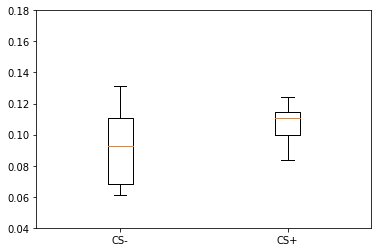

Net 2 10s before g1vsg2 results MannwhitneyuResult(statistic=78.0, pvalue=0.4448534677665506)


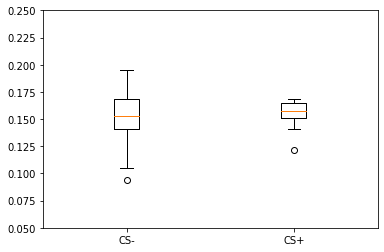

In [35]:
time_list = []
mouse_list = []
group_list = []
net_list = []
for mouse in np.unique(df.mouse):
    if mouse=="Mouse9022":
        continue
    else:
        mouse_mask = np.array(df.mouse).astype(str)==mouse
        ten_b4_mask = df.time.isin(ten_before)

        group = df[mouse_mask==1]["group"].values.astype(str)[0]
        net_list.append(df[mouse_mask==1]["net 1"].transpose().values.reshape(1,-1)[:,:10])
        mouse_list.append(mouse)
        group_list.append(group)

data = np.hstack([np.array(mouse_list).reshape(-1,1),np.array(group_list).reshape(-1,1),np.array(net_list).squeeze()])

df_tenb4 = pd.DataFrame(data)
df_tenb4.columns = np.hstack([["Mouse","Group"],ten_before])
g1_means = np.nanmean(df_tenb4[df_tenb4.Group.astype(str)=="group 1"][ten_before.astype(str)].astype(float).values,axis=1)
g2_means = np.nanmean(df_tenb4[df_tenb4.Group.astype(str)=="group 2"][ten_before.astype(str)].astype(float).values,axis=1)

results = mannwhitneyu(g1_means,g2_means,alternative="greater")
print("Net 1 10s before g1vsg2 results: ",results)

plt.boxplot([g2_means,g1_means])
plt.xticks([1,2],["CS-","CS+"])
plt.ylim([0.04,0.18])
plt.show()


time_list = []
mouse_list = []
group_list = []
net_list = []
for mouse in np.unique(df.mouse):
    if mouse=="Mouse9022": #Dropped because of histology
        continue
    else:
        mouse_mask = np.array(df.mouse).astype(str)==mouse
        ten_b4_mask = df.time.isin(ten_before)

        group = df[mouse_mask==1]["group"].values.astype(str)[0]
        net_list.append(df[mouse_mask==1]["net 2"].transpose().values.reshape(1,-1)[:,:10])
        mouse_list.append(mouse)
        group_list.append(group)

data = np.hstack([np.array(mouse_list).reshape(-1,1),np.array(group_list).reshape(-1,1),np.array(net_list).squeeze()])

df_tenb4 = pd.DataFrame(data)
df_tenb4.columns = np.hstack([["Mouse","Group"],ten_before])
g1_means = np.nanmean(df_tenb4[df_tenb4.Group.astype(str)=="group 1"][ten_before.astype(str)].astype(float).values,axis=1)
g2_means = np.nanmean(df_tenb4[df_tenb4.Group.astype(str)=="group 2"][ten_before.astype(str)].astype(float).values,axis=1)

results = mannwhitneyu(g1_means,g2_means,alternative="greater")
print("Net 2 10s before g1vsg2 results",results)

plt.boxplot([g2_means,g1_means])
plt.xticks([1,2],["CS-","CS+"])
plt.ylim([0.05,0.25])
plt.show()


#### 20s after tone

Net 1 20s after g1vsg2 pval results:  MannwhitneyuResult(statistic=100.0, pvalue=0.08707084160752154)


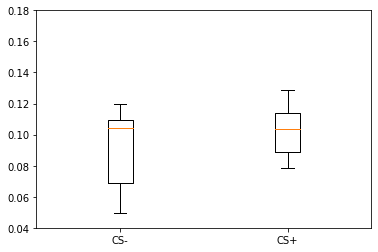

Net 2 20s after g1vsg2 pval results:  MannwhitneyuResult(statistic=110.0, pvalue=0.027828247415465933)


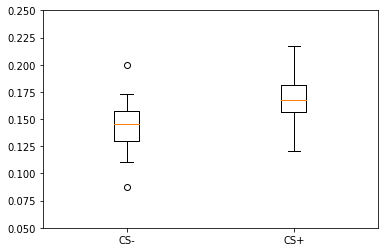

In [36]:
time_list = []
mouse_list = []
group_list = []
net_list = []
for mouse in np.unique(df.mouse):
    if mouse=="Mouse9022":
        continue
    else:
        mouse_mask = np.array(df.mouse).astype(str)==mouse
        ten_b4_mask = df.time.isin(tw_after)

        group = df[mouse_mask==1]["group"].values.astype(str)[0]
        net_list.append(df[mouse_mask==1]["net 1"].transpose().values.reshape(1,-1)[:,10:30])
        mouse_list.append(mouse)
        group_list.append(group)

data = np.hstack([np.array(mouse_list).reshape(-1,1),np.array(group_list).reshape(-1,1),np.array(net_list).squeeze()])

df_tw_after = pd.DataFrame(data)
df_tw_after.columns = np.hstack([["Mouse","Group"],tw_after.astype(str)])
g1_means = np.nanmean(df_tw_after[df_tw_after.Group.astype(str)=="group 1"][tw_after.astype(str)].astype(float).values,axis=1)
g2_means = np.nanmean(df_tw_after[df_tw_after.Group.astype(str)=="group 2"][tw_after.astype(str)].astype(float).values,axis=1)

results = mannwhitneyu(g1_means,g2_means,alternative="greater")
print("Net 1 20s after g1vsg2 pval results: ",results)

plt.boxplot([g2_means,g1_means])
plt.xticks([1,2],["CS-","CS+"])
plt.ylim([0.04,0.18])
plt.show()


time_list = []
mouse_list = []
group_list = []
net_list = []
for mouse in np.unique(df.mouse):
    if mouse=="Mouse9022":
        continue
    else:
        mouse_mask = np.array(df.mouse).astype(str)==mouse
        ten_b4_mask = df.time.isin(tw_after)

        group = df[mouse_mask==1]["group"].values.astype(str)[0]
        net_list.append(df[mouse_mask==1]["net 2"].transpose().values.reshape(1,-1)[:,10:30])
        mouse_list.append(mouse)
        group_list.append(group)

data = np.hstack([np.array(mouse_list).reshape(-1,1),np.array(group_list).reshape(-1,1),np.array(net_list).squeeze()])

df_tw_after = pd.DataFrame(data)
df_tw_after.columns = np.hstack([["Mouse","Group"],tw_after.astype(str)])
g1_means = np.nanmean(df_tw_after[df_tw_after.Group.astype(str)=="group 1"][tw_after.astype(str)].astype(float).values,axis=1)
g2_means = np.nanmean(df_tw_after[df_tw_after.Group.astype(str)=="group 2"][tw_after.astype(str)].astype(float).values,axis=1)

results = mannwhitneyu(g1_means,g2_means,alternative="greater")
print("Net 2 20s after g1vsg2 pval results: ",results)


plt.boxplot([g2_means,g1_means])
plt.xticks([1,2],["CS-","CS+"])
plt.ylim([0.05,0.25])
plt.show()

#### During Airpuff

In [72]:
df = pd.read_csv(fc_start)

net 1 airpuff pval results:  MannwhitneyuResult(statistic=118.0, pvalue=0.009199826430596329)


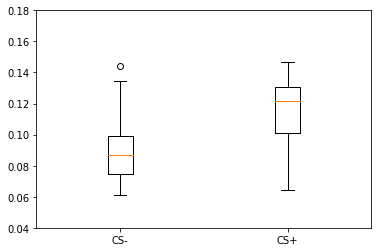

net 2 airpuff pval results:  MannwhitneyuResult(statistic=86.0, pvalue=0.28013678667245523)


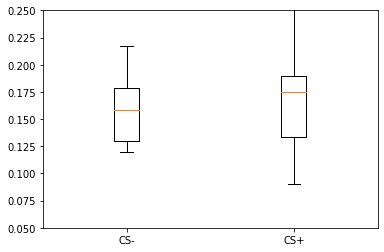

In [73]:
time_list = []
mouse_list = []
group_list = []
net_list = []
for mouse in np.unique(df.mouse):
    if mouse=="Mouse9022":
        continue
    else:
        mouse_mask = np.array(df.mouse).astype(str)==mouse
        ten_b4_mask = df.time.isin(airpuff)

        group = df[mouse_mask==1]["group"].values.astype(str)[0]
        net_list.append(df[mouse_mask==1]["net 1"].transpose().values.reshape(1,-1)[:,38:40])
        mouse_list.append(mouse)
        group_list.append(group)

data = np.hstack([np.array(mouse_list).reshape(-1,1),np.array(group_list).reshape(-1,1),np.array(net_list).squeeze()])

airpuff_stim = pd.DataFrame(data)
airpuff_stim.columns = np.hstack([["Mouse","Group"],airpuff.astype(str)])
g1_means = np.nanmean(airpuff_stim[airpuff_stim.Group.astype(str)=="group 1"][airpuff.astype(str)].astype(float).values,axis=1)
g2_means = np.nanmean(airpuff_stim[airpuff_stim.Group.astype(str)=="group 2"][airpuff.astype(str)].astype(float).values,axis=1)

results = mannwhitneyu(g1_means,g2_means,alternative="greater")
print("net 1 airpuff pval results: ",results)

plt.boxplot([g2_means,g1_means])
plt.xticks([1,2],["CS-","CS+"])
plt.ylim([0.04,0.18])
plt.show()


time_list = []
mouse_list = []
group_list = []
net_list = []
for mouse in np.unique(df.mouse):
    if mouse=="Mouse9022":
        continue
    else:
        mouse_mask = np.array(df.mouse).astype(str)==mouse
        ten_b4_mask = df.time.isin(airpuff)

        group = df[mouse_mask==1]["group"].values.astype(str)[0]
        net_list.append(df[mouse_mask==1]["net 2"].transpose().values.reshape(1,-1)[:,38:40])
        mouse_list.append(mouse)
        group_list.append(group)

data = np.hstack([np.array(mouse_list).reshape(-1,1),np.array(group_list).reshape(-1,1),np.array(net_list).squeeze()])

airpuff_stim = pd.DataFrame(data)
airpuff_stim.columns = np.hstack([["Mouse","Group"],airpuff.astype(str)])
g1_means = np.nanmean(airpuff_stim[airpuff_stim.Group.astype(str)=="group 1"][airpuff.astype(str)].astype(float).values,axis=1)
g2_means = np.nanmean(airpuff_stim[airpuff_stim.Group.astype(str)=="group 2"][airpuff.astype(str)].astype(float).values,axis=1)

results = mannwhitneyu(g1_means,g2_means,alternative="greater")
print("net 2 airpuff pval results: ",results)


plt.boxplot([g2_means,g1_means])
plt.xticks([1,2],["CS-","CS+"])
plt.ylim([0.05,0.25])
plt.show()

In [69]:
np.mean(np.nanmean(airpuff_stim[airpuff_stim.Group=="group 1"][["28","29"]].values.astype(float),axis=1))

0.13506214711815118

In [70]:
airpuff_stim.sort_values("Group")

,Mouse,Group,28,29
24,Mouse9084,group 1,0.0479478426277637,0.1675399839878082
2,Mouse39114,group 1,0.1335629820823669,0.1663799285888672
4,Mouse39121,group 1,0.1134528964757919,0.1781386286020279
20,Mouse9072,group 1,nan,0.1031229272484779
6,Mouse39124,group 1,nan,0.1207260861992836
19,Mouse9071,group 1,nan,0.158133327960968
9,Mouse39133,group 1,0.1338245570659637,0.141498327255249
11,Mouse9001,group 1,0.1774240434169769,0.108947142958641
13,Mouse9011,group 1,0.081510916352272,0.2103079855442047
14,Mouse9013,group 1,nan,0.1383715122938156
